# Support Vector Machine (SVM)

## Resources Used
For this project I will be using Jake VanderPlas's Support Vector Machines notebook and making changes to it. 
- Link to the notebook: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

- Chatgpt 

# Business Understanding 
Link to dataset: https://www.kaggle.com/datasets/ashfakyeafi/cat-dog-images-for-classification

**Objective:** To develop a machine learning model that accurately classifies images as either cats or dogs. 

**Success Criteria:** An understanding of how Support Vector Machines work and develop model with high accuracy that can classify images as either cats or dogs.

# Data Understanding

## Cat & Dog images for Classification

**Data Collection:** The `cat_dog` folder contains images labeled as either cats or dogs.

**Data Description:** Each image is either a cat or a dog.

**Data Exploration:** Explore the dataset to understand its size, structure, and labels.

# Data Preparation

**Data Cleaning:** Reduced the images in the `cat_dog` folder down from 25,000 images to 5,000 as the size was too big to upload to GitHub. 

**Feature Engineering:** Resized the images to a standard size (150x150 pixels) and flattened them to create a feature matrix.

**Train-Test Split:** Split the data into training and testing sets.

# Modelling

**Model Selection:** A Support Vector Machine (SVM) classifier with a Radial Basis Function (RBF) kernel and a Principal Component Analysis (PCA) preprocessor was chosen for this.

**Model Training:** Trained the chosen model on the training data.

**Model Evaluation:** Evaluated the models performance on the testing data using accuracy score, classification report, and a confusion matrix.

# Evaluation 

**Model Performance:** The model's performance was evaluated using the accuracy score, classification report, and confusion matrix. The accuracy score for the model was 0.630418809698751. 

# Deployment 
The model is trained to distinguish the difference between cat and dogs but I found during deployment I encountered an issue where it it takes a significant amount of time for it to deploy. The model is serialized using the pickle library and saved to a file named cat_dog_model.pkl. 

# Changes Made To Notebook 


I started with importing the make_blobs data and other necessary imports. I also increased the same size from 50 to 100. 

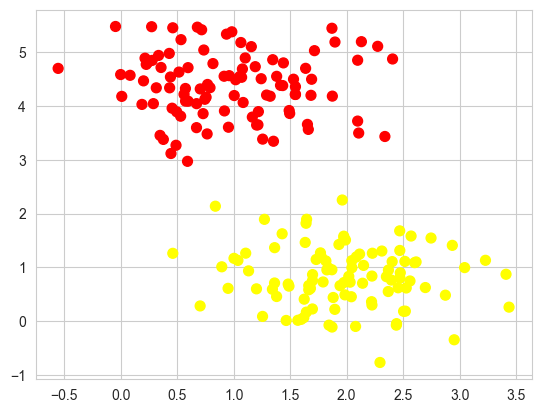

In [70]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
from scipy import stats

# Try to import seaborn as a style
try:
  import seaborn as sns
  sns.set_style('whitegrid')
except ImportError:
  # If seaborn is not installed, use default matplotlib style
  plt.style.use('seaborn-whitegrid')


from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

By increasing the sample size, some of the data is now residing on top of the linear separators. This is good because it is more likely to be classified correctly. The decision boundary is represented by the black line in the below code.

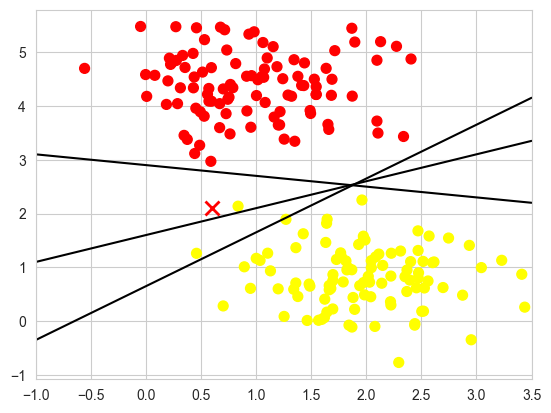

In [71]:
# Generate a set of x values for the lines
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

 The shaded area around the decision boundary represents the uncertainty of the classifier

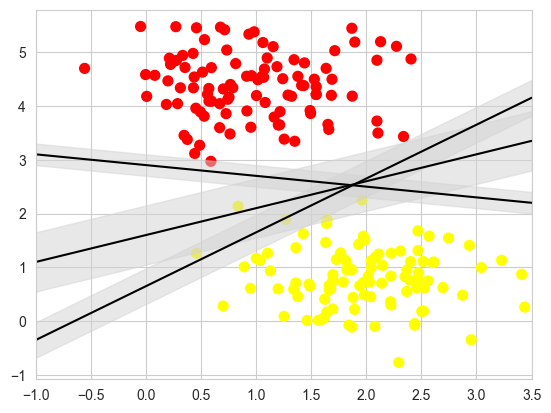

In [72]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='lightgray', alpha=0.5)

plt.xlim(-1, 3.5);



For fitting a support vector machine, I changed the the 'C' parameter to a different number. I changed it from 1E10 to 2E10. 

In [80]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=2E10)
model.fit(X, y)

SVC(C=20000000000.0, kernel='linear')

In [81]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',
                   facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

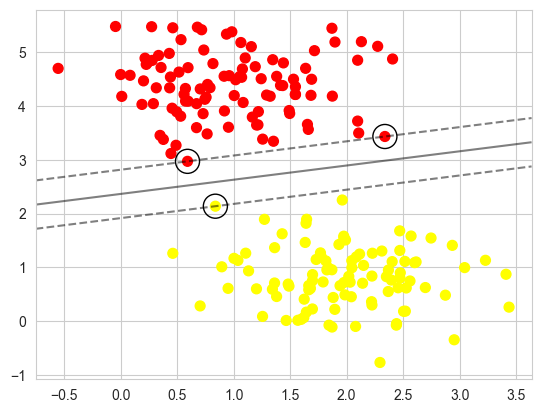

In [82]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

I then decided to change the kernel of the model from linear to rbf to see the difference. From what I noticed with the changes is that the linear kernel has a linear decision boundary
and the rbf kernel has a non-linear decision boundary.
 I then changed it to poly and it is similiar to rbf where it has a non-linear decision boundary. 

In [83]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='rbf', C=2E10)
model.fit(X, y)

SVC(C=20000000000.0)

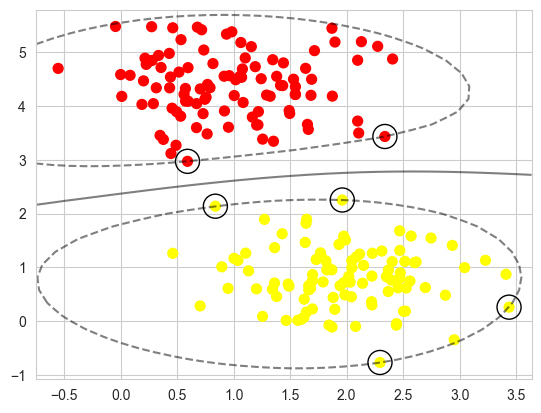

In [84]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [86]:

from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='poly', C=2E10)
model.fit(X, y)

SVC(C=20000000000.0, kernel='poly')

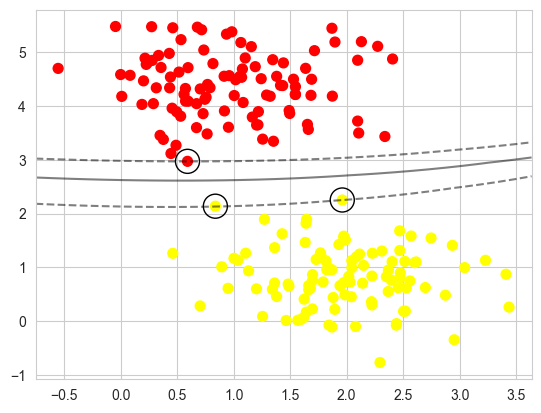

In [87]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

# Using SVM On the Cat & Dog Dataset 


In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
from scipy import stats

# Try to import seaborn as a style
try:
  import seaborn as sns
  sns.set_style('whitegrid')
except ImportError:
  # If seaborn is not installed, use default matplotlib style
  plt.style.use('seaborn-whitegrid')

In [32]:
import os
import pandas as pd

# encoding parameter is used to handle different types of encoding (Added this as the default encoding was not working)
df = pd.read_csv("cat_dog.csv", encoding='latin1')

# Display the data
print(df)

               image  labels
0      dog.11289.jpg       1
1      cat.10836.jpg       0
2       cat.7970.jpg       0
3       cat.2212.jpg       0
4       dog.2653.jpg       1
...              ...     ...
24995  dog.12201.jpg       1
24996   dog.2893.jpg       1
24997  cat.12267.jpg       0
24998   dog.4380.jpg       1
24999   cat.7962.jpg       0

[25000 rows x 2 columns]


Since the cat_dog folder had a lot of images, I had to reduce the images down to 500 images of dogs and 500 images of cats each as the original folder was too big for Github. I created a new folder called `cat_dog_set` and placed 1000 images in here. As I can not upload the cat_dog folder, I will link it in the CRISP-DM section above. 

In [51]:
import os
import shutil
import random

# Define the source and destination folders (cat_dog was too large to upload to GitHub, so I used a smaller dataset instead)
source_folder = 'cat_dog'
destination_folder = 'cat_dog_set'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# List the files in the source folder
file_list = os.listdir(source_folder)

# Shuffle the file list
random.shuffle(file_list)

# Counters for cats and dogs
cat_count = 0
dog_count = 0

# Loop through the files in the source folder
for file in file_list:
    # Check if the file is an image
    if file.endswith('.jpg') or file.endswith('.png'):
        # Check if the file contains 'cat' or 'dog'
        if 'cat' in file and cat_count < 1000:
            # Copy the file to the destination folder
            shutil.copy(os.path.join(source_folder, file), os.path.join(destination_folder, file))
            cat_count += 1
        elif 'dog' in file and dog_count < 1000:
            # Copy the file to the destination folder
            shutil.copy(os.path.join(source_folder, file), os.path.join(destination_folder, file))
            dog_count += 1

    # Check if reached the desired number of cats and dogs
    if cat_count >= 1000 and dog_count >= 1000:
        break

print(f'Copied {cat_count} cat images and {dog_count} dog images to {destination_folder}')


Copied 1000 cat images and 1000 dog images to cat_dog_set


In [52]:
import os

# Define the source folder
source_folder = 'cat_dog_set'

# List the items in the source folder
items = os.listdir(source_folder)

# Count the number of items
num_items = len(items)

# Print the number of items
print(f'There are {num_items} items in the {source_folder} folder.')


There are 5444 items in the cat_dog_set folder.


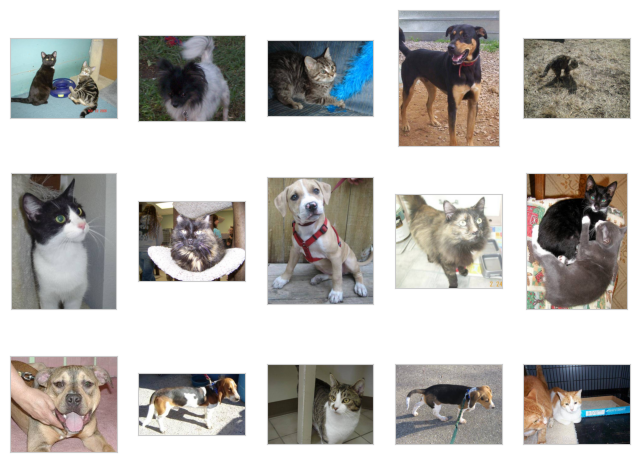

Accuracy: 0.630418809698751


In [53]:
import os
import shutil
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import numpy as np
import cv2



# Display a random subset of the copied images
fig, ax = plt.subplots(3, 5, figsize=(8, 6))
for i, axi in enumerate(ax.flat):
    # Select a random image from the destination folder
    random_image = random.choice(os.listdir(destination_folder))
    
    # Load and display the image
    img = mpimg.imread(os.path.join(destination_folder, random_image))
    axi.imshow(img)
    
    # Remove axis ticks and labels
    axi.set(xticks=[], yticks=[])
    
plt.show()

# Define the model
pca = PCA(n_components=150, whiten=True, svd_solver='randomized', random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

# Load the images and labels
images = []
labels = []
for file in os.listdir(destination_folder):
    # Load the image
    img = mpimg.imread(os.path.join(destination_folder, file))
    
    # Resize the image to the desired dimensions
    width, height = 150, 150
    resized_img = cv2.resize(img, (width, height))
    
    # Append the resized image data to the images list
    images.append(resized_img)
    
    # Append the label (1 for cat, 0 for dog) to the labels list
    if 'cat' in file:
        labels.append(1)
    else:
        labels.append(0)

# Convert the lists to numpy arrays (required for the model)
images = np.array(images)
labels = np.array(labels)

# Flatten the images 
X_flat = images.reshape(images.shape[0], -1)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_flat, labels, test_size=0.25, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


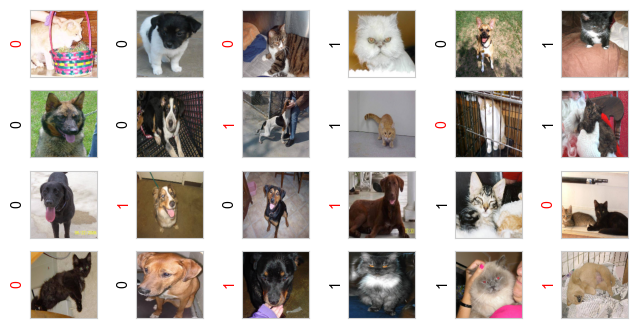

In [54]:
# Displaying the first 10 test images and their predicted labels (1 for cat, 0 for dog)
fig, ax = plt.subplots(4, 6, figsize=(8, 4))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(150, 150, 3))
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(y_pred[i], color='black' if y_pred[i] == y_test[i] else 'red')



              precision    recall  f1-score   support

           0       0.63      0.59      0.61       660
           1       0.63      0.67      0.65       701

    accuracy                           0.63      1361
   macro avg       0.63      0.63      0.63      1361
weighted avg       0.63      0.63      0.63      1361



Text(113.9222222222222, 0.5, 'predicted label')

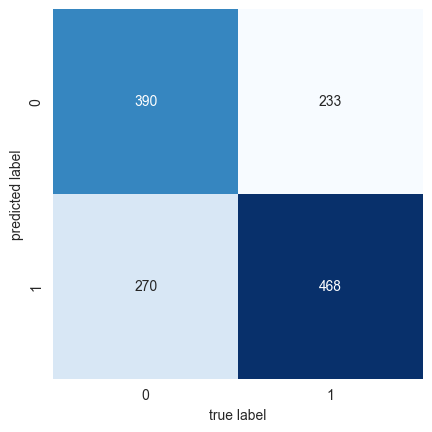

In [55]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Displays the confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label')


In [58]:
import pickle

with open('cat_dog_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [60]:
import pickle
from flask import Flask, request, jsonify

# Serialize the model
with open('cat_dog_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Initialize Flask app
app = Flask(__name__)

# Define a route for the API
@app.route('/predict', methods=['POST'])
def predict():
    # Get the image data from the request
    image_data = request.files['image'].read()
    
    # Convert the image data to a numpy array
    image_array = cv2.imdecode(np.frombuffer(image_data, np.uint8), -1)
    
    # Preprocess the image (resize and flatten)
    resized_img = cv2.resize(image_array, (150, 150))
    flattened_img = resized_img.reshape(1, -1)
    
    # prediction using the model
    prediction = model.predict(flattened_img)
    
    # Return the predicted class as JSON
    return jsonify({'prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=False)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [03/Mar/2024 20:31:56] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [03/Mar/2024 20:31:56] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [03/Mar/2024 20:31:57] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [03/Mar/2024 20:35:40] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [03/Mar/2024 20:35:43] "GET / HTTP/1.1" 404 -
